In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import skfuzzy as fuzz
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Charger le DataSet
data= pd.read_csv('cc_general.csv')

In [3]:
## Exploration des données
print("\nExploration des données :")
print(data.info())
print("\nPremières lignes :")
print(data.head())
print("\nValeurs manquantes :")
print(data.isnull().sum())


Exploration des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non

In [4]:
## Résumé statistique
print("\nRésumé statistique :")
stats = data.describe()
print(stats)


Résumé statistique :
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.00

<Figure size 1000x1000 with 0 Axes>

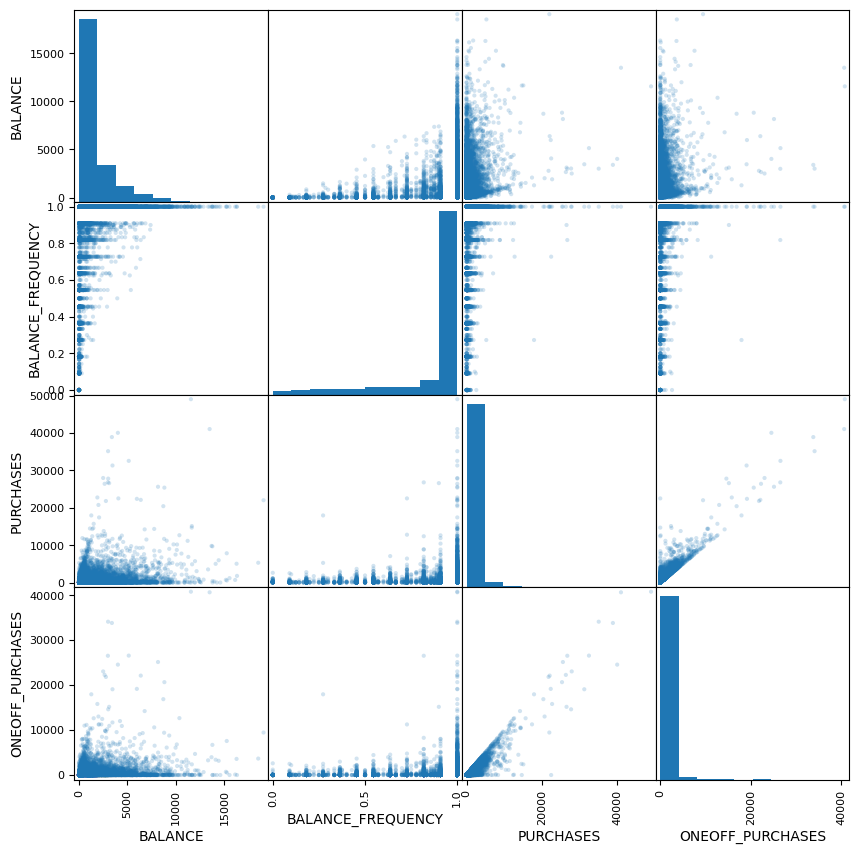

In [5]:
## Visualisation avec scatter_matrix
plt.figure(figsize=(10, 10))
scatter_matrix(data.iloc[:, 1:5], alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()

In [6]:
## Réduction de dimensionnalité (PCA et t-SNE)
features = data.iloc[:, 1:].select_dtypes(include=[np.number]).dropna()


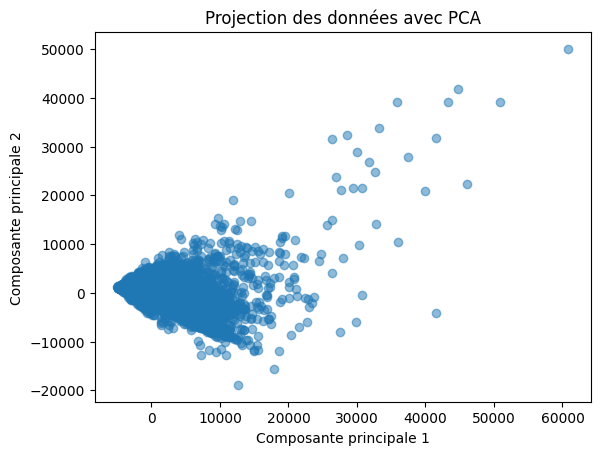

In [7]:
### PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.title("Projection des données avec PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

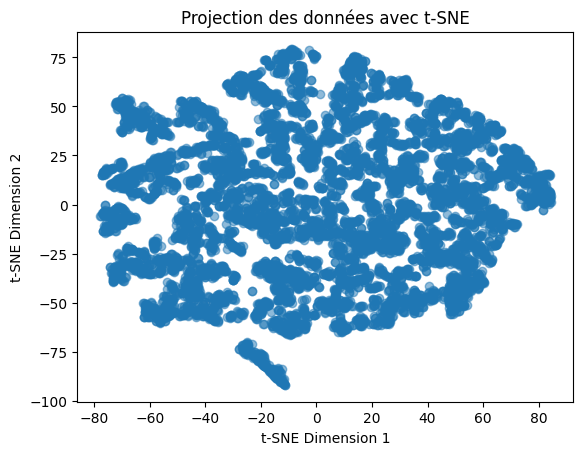

In [8]:
### t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], alpha=0.5)
plt.title("Projection des données avec t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [10]:
## KMeans avec PCA et t-SNE
### Définir K optimal (méthode Elbow)
inertia_pca = []
inertia_tsne = []
k_values = range(1, 11)

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42).fit(pca_features)
    inertia_pca.append(kmeans_pca.inertia_)

    kmeans_tsne = KMeans(n_clusters=k, random_state=42).fit(tsne_features)
    inertia_tsne.append(kmeans_tsne.inertia_)


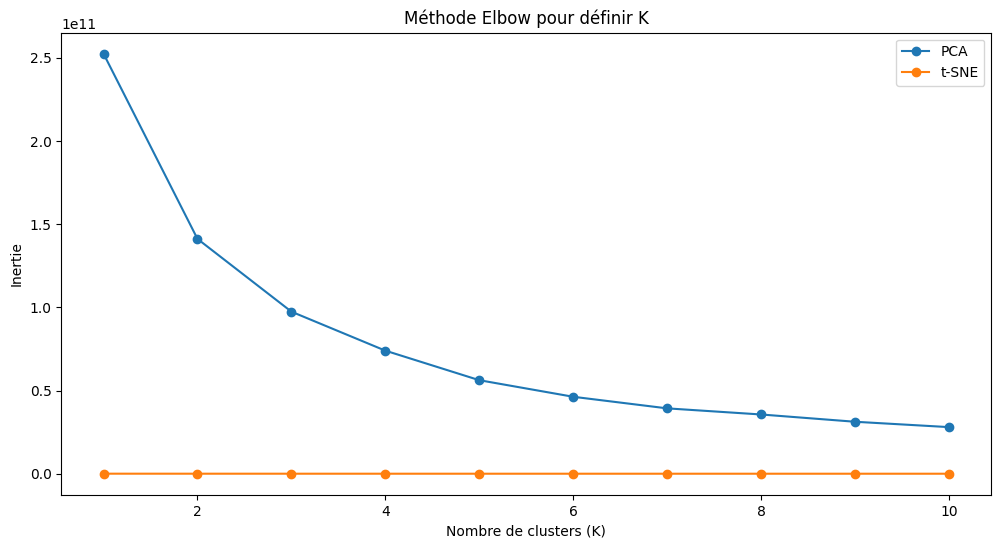

In [12]:
# Graphe de la méthode Elbow
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia_pca, marker='o', label='PCA')
plt.plot(k_values, inertia_tsne, marker='o', label='t-SNE')
plt.title("Méthode Elbow pour définir K")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.legend()
plt.show()

In [13]:
### Modèles finaux (K choisi basé sur le coude)
k_final = 3
kmeans_pca = KMeans(n_clusters=k_final, random_state=42).fit(pca_features)
kmeans_tsne = KMeans(n_clusters=k_final, random_state=42).fit(tsne_features)


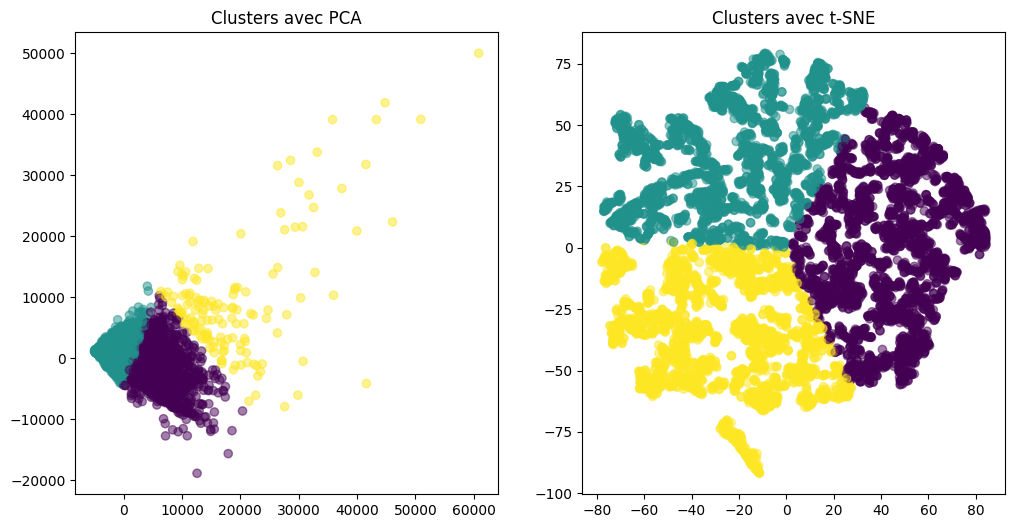

In [14]:
# Visualisation des clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_pca.labels_, cmap='viridis', alpha=0.5)
plt.title("Clusters avec PCA")

plt.subplot(1, 2, 2)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=kmeans_tsne.labels_, cmap='viridis', alpha=0.5)
plt.title("Clusters avec t-SNE")
plt.show()


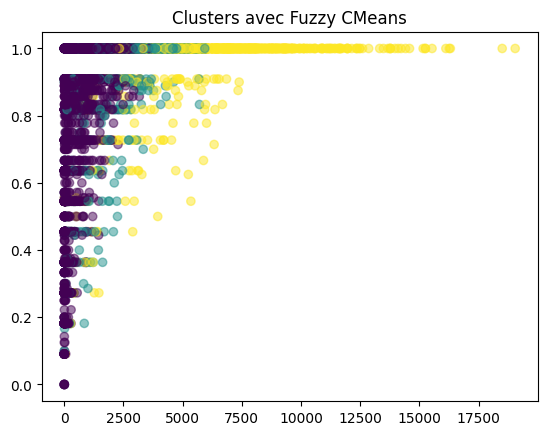

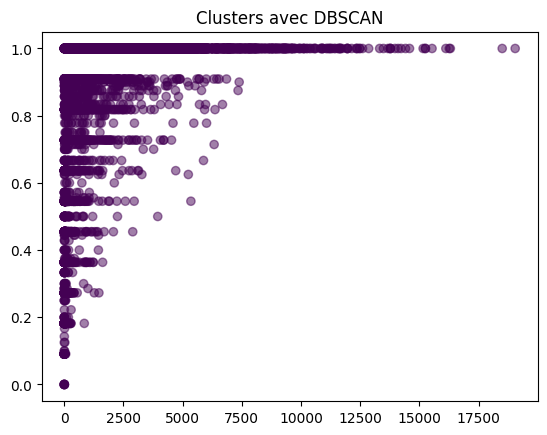

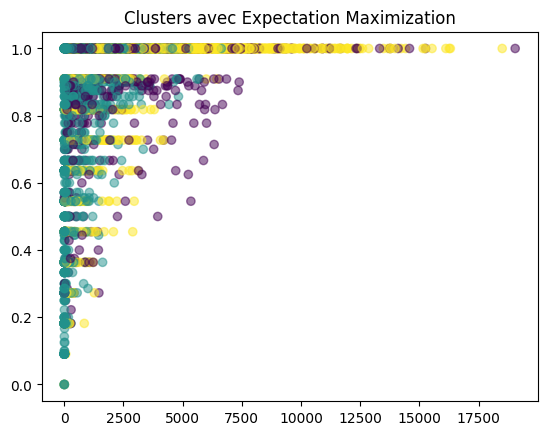

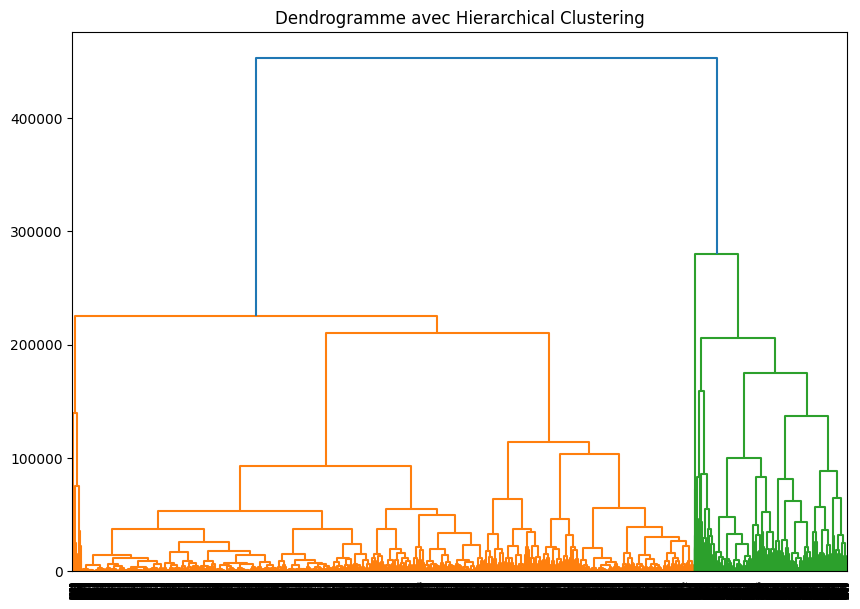

In [17]:
### Fuzzy CMeans
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(features.T, c=k_final, m=2, error=0.005, maxiter=1000)
cluster_membership = np.argmax(u, axis=0)
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=cluster_membership, cmap='viridis', alpha=0.5)
plt.title("Clusters avec Fuzzy CMeans")
plt.show()

### DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5).fit(features)
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=dbscan.labels_, cmap='viridis', alpha=0.5)
plt.title("Clusters avec DBSCAN")
plt.show()

### Expectation Maximization (EM)
em = GaussianMixture(n_components=k_final, random_state=42).fit(features)
em_labels = em.predict(features)
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=em_labels, cmap='viridis', alpha=0.5)
plt.title("Clusters avec Expectation Maximization")
plt.show()

